<h2 align="center">Лабораторна робота №1</h2>
<h5 align="center"><i>Роботу виконала студентка групи ФІ-21, Денисенко Анастасія</i></h5>
<p><b>Тема роботи:</b> "Популяційні алгоритми. Розроблення програмного забезпечення знаходження глобальних екстремумів багатовимірних функцій".</p>
<p><b>Мета роботи:</b> опанувати принципи роботи генетичних алгоритмів, алгоритму оптимізації сірими вовками, розробити власне відповідне програмне забезпечення знаходження глобальних екстремумів у задачах багатовимірної онокритеріальної оптимізації.</p>

### Завдання до лабораторної роботи:

1. Ознайомитися з теоретичними відомостями до кожного з розглянутих методів й алгоритмів (генетичний алгоритм оптимізації та алгоритм оптимізації зграєю сірих вовків).
2. Для генетичного алгоритму всі процеси (схрещування, мутацію та відбір) розглядати лише у двійковому коді. Як варіант, двійковий код (код хромосоми) можна перевести у дійсне число з проміжку $x\in[a; b]$ за формулою: $x = \frac{\text{Dec}(\text{code})}{2^w - 1} \cdot (b-a) + a$, де $w$ - кількість бітів кожної хромосоми (задається у програмі), $\text{Dec}(\text{code})$ - функція переведення двійкового коду (змінна $\text{code}$) хромосоми в десяткове число.
3. Розробити програмне забезпечення (мова програмування і середовище розробки за вибором студента) для тестування описаних вище алгоритмів (генетичний алгоритм та алгоритм зграї сірих вовків) на одновимірній тестовій одноекстремальній функції.
4. Модифікувати програми так, щоб можна було бачити процес пошуку глобального екстремуму. Тобто потрібно продемонструвати положення популяції на функції на кожній ітерації.
5. Модифікувати програми на випадок пошуку глобального екстремуму двовимірної (багатовимірної) функції. Також показати процес пошуку глобального екстремуму. Тобто потрібно продемонструвати положення популяції на функції на кожній ітерації. Показати зміну положення популяції на контурному графіку для двовимірних функцій.
6. Для багатовимірних одноекстремальних функцій (на прикладі функції Растринга при $n\geq 3$) показати лише графік пристосованості популяції (за критерієм значення функції кожного елемента популяції), а також показати графік відстані від кращого елемента популяції (значення функції) до відомого оптимального значення функції, яке вказане. Тобто останньому в графіку по осі абсцис відкладається номер ітерації, а по осі ординат - найменше значення відстані між оптимальним значенням функції і кращим.
7. Обрати будь-яку іншу з функцій, що не наведені у даній лабораторній роботі, знайти її глобальний екстремум, продемонструвати відповідні результати.
8. Зробити висновки до отриманих результатів.
9. Зробити звіт у PDF-форматі з результатами виконання лабораторної роботи і завантажити його до Classroom.
10. Захистити лабораторну роботу у викладача.

In [75]:
%matplotlib widget

In [83]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib

In [85]:
class Wolves_optimization:
    def __init__(self, func, max_iter, s, step_x, x_min, x_max, step_y = None, y_min = None, y_max = None, minimize = True):
        self.func = func
        self.max_iter = max_iter
        self.s = s
        self.step_x = step_x
        self.x_min = x_min
        self.x_max = x_max
        self.step_y = step_y
        self.y_min = y_min
        self.y_max = y_max
        self.minimize = minimize
    def optimize(self):
        wolves = np.linspace(self.x_min, self.x_max, num = self.s)
        iter = 0
        Gbest = self.func(wolves[0])
        x_wolf = 0
        while iter != self.max_iter:
            for wolf in range(len(wolves)):
                if Gbest - wolves[wolf] != 0:
                    wolves[wolf] += self.step_x * ((Gbest - wolves[wolf])/np.linalg.norm(Gbest - wolves[wolf]))
                    if self.minimize == True and self.func(wolves[wolf]) < Gbest:
                        Gbest = self.func(wolves[wolf])
                        x_wolf = wolves[wolf]
                    elif self.minimize == False and self.func(wolves[wolf]) > Gbest:
                        Gbest = self.func(wolves[wolf])
                        x_wolf = wolves[wolf]
                else:
                    pass
            iter += 1
        return x_wolf, Gbest
    def plot(self):
        x, y = self.optimize()
        wolves = np.linspace(self.x_min, self.x_max, num = 350)
        fig, ax = plt.subplots()
        ys = []
        for i in wolves:
            ys.append(self.func(i))
        ax.plot(wolves, ys, linewidth=2.0)
        ax.scatter(x, y, c = 'orchid')
        plt.show()
    def optimize_and_plot(self):
        wolves = np.linspace(self.x_min, self.x_max, num = self.s)
        xs = np.linspace(self.x_min, self.x_max, num = 350)
        ys = []
        for i in xs:
            ys.append(self.func(i))
        iter = 0
        Gbest = self.func(xs[0])
        x_wolf = xs[0]
        while iter != self.max_iter:
            clear_output(wait=True)
            plt.plot(xs, ys, linewidth=2.0)
            for i in wolves:
                plt.scatter(i, self.func(i), c = 'lightblue')
            plt.scatter(x_wolf, Gbest, c = 'orchid')
            plt.show()
            for wolf in range(len(wolves)):
                if Gbest - wolf != 0:
                    wolves[wolf] += self.step_x * ((Gbest - wolves[wolf])/np.linalg.norm(Gbest - wolves[wolf]))
                    if self.minimize == True and self.func(wolves[wolf]) < Gbest:
                        Gbest = self.func(wolves[wolf])
                        x_wolf = wolves[wolf]
                    elif self.minimize == False and self.func(wolves[wolf]) > Gbest:
                        Gbest = self.func(wolves[wolf])
                        x_wolf = wolves[wolf]
                else:
                    pass
            iter += 1
        return x_wolf, Gbest
    def optimize_x_and_y(self):
        stp_x = abs((self.x_min - self.x_max))/self.s
        stp_y = abs((self.y_min - self.y_max))/self.s
        wolves_x, wolves_y = np.arange(self.x_min, self.x_max, stp_x), np.arange(self.y_min, self.y_max, stp_y)
        wolves_x, wolves_y = np.meshgrid(wolves_x, wolves_y)
        iter = 0
        X, Y = np.arange(self.x_min, self.x_max, 0.25), np.arange(self.y_min, self.y_max, 0.25)
        X, Y = np.meshgrid(X, Y)
        x_wolf = X[0][0]
        y_wolf = Y[0][0]
        Gbest = self.func(x_wolf, y_wolf)
        while iter != self.max_iter:
            for i in range(wolves_x.shape[0]-1):
                for j in range(wolves_x.shape[0]-1):
                    if Gbest != wolves_x[i][j]:
                         wolves_x[i][j] += self.step_x * ((Gbest - wolves_x[i][j])/np.linalg.norm(Gbest - wolves_x[i][j]))
                    else:
                         pass
                    if Gbest != wolves_y[i][j]:
                        wolves_y[i][j] += self.step_y * ((Gbest - wolves_y[i][j])/np.linalg.norm(Gbest - wolves_y[i][j]))
                    else:
                        pass
                    if self.minimize == True and self.func(wolves_x[i][j], wolves_y[i][j]) < Gbest:
                        x_wolf = wolves_x[i][j]
                        y_wolf = wolves_y[i][j]
                        Gbest = self.func(x_wolf, y_wolf)
                    elif self.minimize == False and self.func(wolves_x[i][j], wolves_y[i][j]) > Gbest:
                        x_wolf = wolves_x[i][j]
                        y_wolf = wolves_y[i][j]
                        Gbest = self.func(x_wolf, y_wolf)
            iter += 1
        return x_wolf, y_wolf, Gbest
    def plot_x_and_y(self):
        x, y, z = self.optimize_x_and_y()
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        X, Y = np.arange(self.x_min, self.x_max, 0.25), np.arange(self.y_min, self.y_max, 0.25)
        X, Y = np.meshgrid(X, Y)
        Z = self.func(X, Y)
        surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=False, alpha=0.25)
        ax.set_zlim(Z.min(), Z.max())
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter('{x:.02f}')
        ax.scatter(x, y, z, c = 'orchid')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()
        return x, y, z

    def optimize_and_plot_x_and_y(self):
        fig = plt.figure()
        ax = fig.add_subplot(111,projection='3d')
        X, Y = np.arange(self.x_min, self.x_max, 0.25), np.arange(self.y_min, self.y_max, 0.25)
        X, Y = np.meshgrid(X, Y)
        def get_all_wolves():
            res_x = []
            res_y = []
            res_z = []
            stp_x = abs((self.x_min - self.x_max))/self.s
            stp_y = abs((self.y_min - self.y_max))/self.s
            wolves_x, wolves_y = np.arange(self.x_min, self.x_max, stp_x), np.arange(self.y_min, self.y_max, stp_y)
            wolves_x, wolves_y = np.meshgrid(wolves_x, wolves_y)
            iter = 0
            Gbest = self.func(wolves_x[0][0], wolves_y[0][0])
            x_wolf = 0
            y_wolf = 0
            while iter != self.max_iter:
                curr_x = []
                curr_y = []
                curr_z = []
                for i in range(wolves_x.shape[0]-1):
                    for j in range(wolves_x.shape[0]-1):
                        if Gbest != wolves_x[i][j]:
                            wolves_x[i][j] += self.step_x * ((Gbest - wolves_x[i][j])/np.linalg.norm(Gbest - wolves_x[i][j]))
                        else:
                            pass
                        if Gbest != wolves_y[i][j]:
                            wolves_y[i][j] += self.step_y * ((Gbest - wolves_y[i][j])/np.linalg.norm(Gbest - wolves_y[i][j]))
                        else:
                            pass
                        if self.minimize == True and self.func(wolves_x[i][j], wolves_y[i][j]) < Gbest:
                            x_wolf = wolves_x[i][j]
                            y_wolf = wolves_y[i][j]
                            Gbest = self.func(x_wolf, y_wolf)
                            curr_x.append(x_wolf)
                            curr_y.append(y_wolf)
                            curr_z.append(Gbest)
                        elif self.minimize == False and self.func(wolves_x[i][j], wolves_y[i][j]) > Gbest:
                            x_wolf = wolves_x[i][j]
                            y_wolf = wolves_y[i][j]
                            Gbest = self.func(x_wolf, y_wolf)
                            curr_x.append(x_wolf)
                            curr_y.append(y_wolf)
                            curr_z.append(Gbest)
                        else:
                            curr_x.append(wolves_x[i][j])
                            curr_y.append(wolves_y[i][j])
                            curr_z.append(self.func(wolves_x[i][j], wolves_y[i][j]))
                res_x.append(curr_x)
                res_y.append(curr_y)
                res_z.append(curr_z)
                iter += 1
            return res_x, res_y, res_z
        X, Y = np.arange(self.x_min, self.x_max, 0.25), np.arange(self.y_min, self.y_max, 0.25)
        X, Y = np.meshgrid(X, Y)
        Z = self.func(X, Y)
        def update_graph(num):
            all_pop._offsets3d = (res_x[num], res_y[num], res_z[num])
            title.set_text('Wolves optimization, iteration {}'.format(num+1))
        res_x, res_y, res_z = get_all_wolves()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        title = ax.set_title('Wolves optimization')
        all_pop = ax.scatter([], [], [], c = 'cornflowerblue', zorder = 1)
        surf = ax.plot_surface(X, Y, Z, cmap = cm.viridis, linewidth=0, antialiased = False, alpha=0.25)
        ani = matplotlib.animation.FuncAnimation(fig, update_graph, self.max_iter, interval=60, blit=False, repeat=False)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()

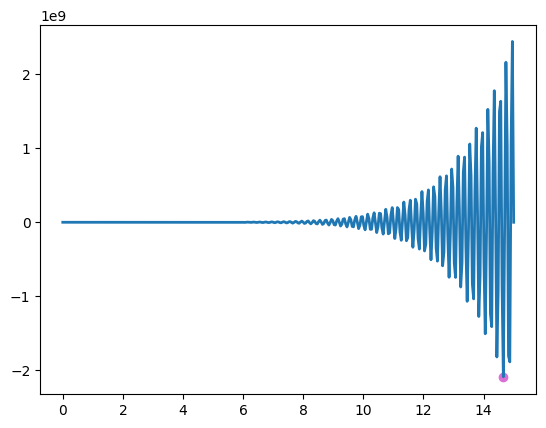

In [17]:
x = np.linspace(0.0, 15.0, num = 100)
def f(x):
    return (x**3)*(3-x**5)*np.sin(10*np.pi*x)
w = Wolves_optimization(f, 60, 60, 0.1, 0, 15, minimize = True)
w.plot()

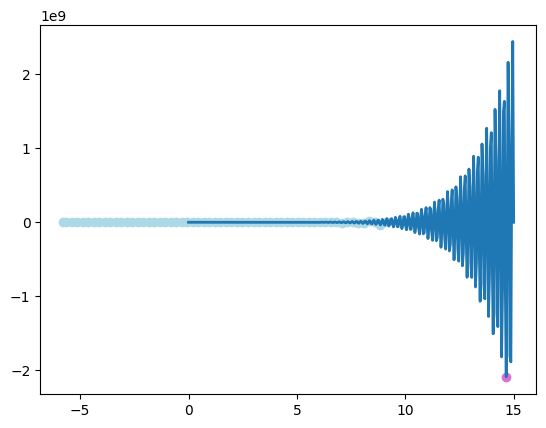

(14.645762711864407, -2098140853.8990982)

In [121]:
# PLEASE, DON'T RUN THIS IN PY FILE!
w.optimize_and_plot()

In [21]:
def function_3d(X, Y):
    return -20*np.e**(-0.2*np.sqrt(0.5*(X**2 + Y**2))) - np.e**(0.5*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))) + np.e + 20

In [23]:
w1 = Wolves_optimization(function_3d, 50, 50, 0.1, -5, 5, 0.1, -5, 5, minimize = True)

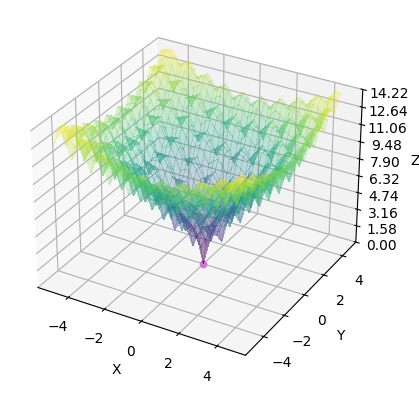

(-1.3877787807814457e-16, -1.3877787807814457e-16, 0.0)

In [25]:
w1.plot_x_and_y()

In [69]:
def f2(x1, x2):
    return (4-2.1*x1**2 + (x1**4)/3)*x1**2 + x1*x2 + (-4+4*x2**2)*x2**2

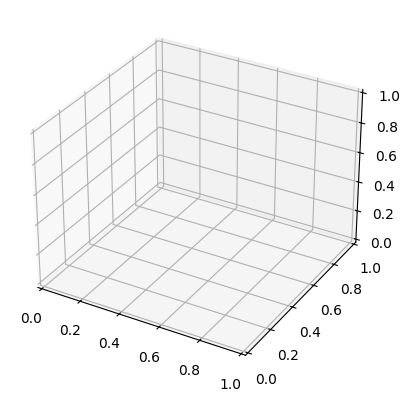

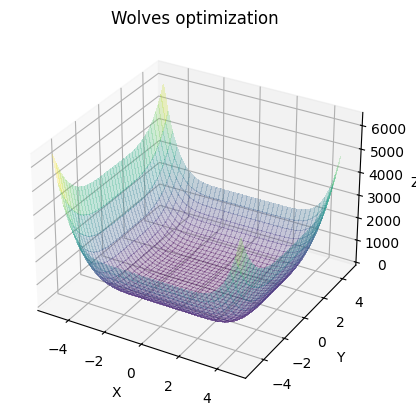

In [117]:
# PLEASE, RUN THIS IN PY FILE!
w2 = Wolves_optimization(f2, 50, 50, 0.1, -5, 5, 0.1, -5, 5, minimize = True)
w2.optimize_and_plot_x_and_y()

In [103]:
class Genetic_optimization_for_x:
    def __init__(self, func, pop_num_max, top_best, x_min, x_max, chrom_lenght, prob_mutation, pop_size, minimize = True):
        self.func = func
        self.pop_num_max = pop_num_max
        self.top_best = top_best
        self.x_min = x_min
        self.x_max = x_max
        self.chrom_lenght = chrom_lenght
        self.prob_mutation = prob_mutation
        self.pop_size = pop_size
        self.minimize = minimize
    def create_first_population(self):
        f_pop = []
        for i in range(self.pop_size):
            chromosome = ""
            for j in range(self.chrom_lenght):
                chromosome += str(random.randrange(0, 2))
            f_pop.append(chromosome)
        return f_pop
    def bin_to_dec_a_to_b(self, chromosome):
        return int(chromosome, 2)*(self.x_max - self.x_min)/(2**self.chrom_lenght - 1) + self.x_min
    def crossover(self, p1, p2):
        divide_by = random.randrange(1, self.chrom_lenght)
        child1, child2 = p1[:divide_by] + p2[divide_by:], p2[:divide_by] + p1[divide_by:]
        return child1, child2
    def mutation(self, chromosome):
        gene = random.randrange(0, self.chrom_lenght)
        chromosome = chromosome[:gene] + '0' + chromosome[gene+1:] if chromosome[gene] == '1' else chromosome[:gene] + '0' + chromosome[gene+1:]
        return chromosome
    
    def fitness(self, chromosome):
        fit = self.func(self.bin_to_dec_a_to_b(chromosome))
        return fit
    
    def birth_children(self, population):
        new_population = []
        fitnesses = {}
        for i in range(len(population)):
            fitnesses[self.fitness(population[i])] = population[i]
        sorted_fitnesses = dict(sorted(fitnesses.items()))
        if self.minimize == True:
            parents = list(sorted_fitnesses.values())[0:self.top_best]
        else:
            parents = list(sorted_fitnesses.values())[-self.top_best:]
        for i in range(len(parents)):
            new_population.append(parents[i])
        pairs = [[parents[i], parents[j]] for i in range(len(parents)) for j in range(i + 1, len(parents))]
        for i in range(len(pairs)):
            child1, child2 = self.crossover(pairs[i][0], pairs[i][0])
            chance = random.uniform(0, 1)
            child = random.randrange(0, 1)
            if chance <= self.prob_mutation:
                if child == 0:
                    child1 = self.mutation(child1)
                else:
                    child2 = self.mutation(child2)
            new_population.append(child1)
            new_population.append(child2)
        return new_population
    def optimize(self):
        population = self.create_first_population()
        pop_num = 1
        while pop_num != self.pop_num_max:
            population = self.birth_children(population)
            pop_num += 1
        best = population[0]
        best_fitness = self.fitness(population[0])
        if self.minimize == True:
            for i in range(len(population)):
                if self.fitness(population[i]) < best_fitness:
                    best = population[i]
        else:
            for i in range(len(population)):
                if self.fitness(population[i]) > best_fitness:
                    best = population[i]
        return self.bin_to_dec_a_to_b(best), self.func(self.bin_to_dec_a_to_b(best))
    def plot(self):
        x, y = self.optimize()
        xs = np.linspace(self.x_min, self.x_max, num = 350)
        f = self.func(xs)
        fig, ax = plt.subplots()
        ax.plot(xs, f, linewidth = 2.0)
        ax.scatter(x, y, c = 'orchid')
        plt.show()
    def optimize_and_plot(self):
        xs = np.linspace(self.x_min, self.x_max, num = 350)
        f = self.func(xs)
        population = self.create_first_population()
        pop_num = 1
        while pop_num != self.pop_num_max:
            clear_output(wait=True)
            plt.plot(xs, f, linewidth = 2.0, c = '#1f77b4')
            population = self.birth_children(population)
            best = self.bin_to_dec_a_to_b(population[0])
            lst = []
            lst1 = []
            func_best = self.func(best)
            if self.minimize == True:
                for i in population:
                    dec = self.bin_to_dec_a_to_b(i)
                    lst.append(dec)
                    func_dec = self.func(dec)
                    lst1.append(func_dec)
                    if func_dec <= func_best:
                        best = self.bin_to_dec_a_to_b(i)
                        func_best = self.func(best)
            else:
                for i in population:
                    dec = self.bin_to_dec_a_to_b(i)
                    func_dec = self.func(dec)
                    if func_dec >= func_best:
                        best = self.bin_to_dec_a_to_b(i)
                        func_best = self.func(best)
            for i in range(len(lst1)):
                plt.scatter(lst[i], lst1[i], c = 'lightblue')
            plt.scatter(best, func_best, c = 'orchid')
            pop_num += 1
            plt.show()
        return best, func_best
    

In [37]:
def f(x):
    return (x**3)*(3-x**5)*np.sin(10*np.pi*x)

In [105]:
g = Genetic_optimization_for_x(f, 40, 5, 0, 15, 8, 0.3, 40, minimize = True)

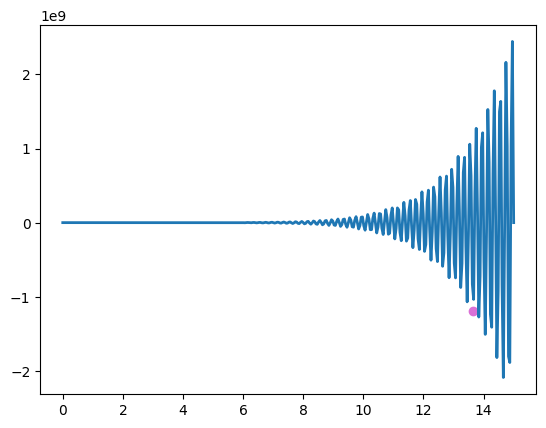

In [99]:
g.plot()

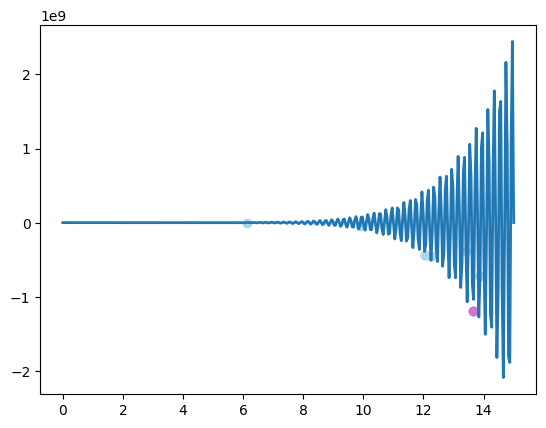

(13.647058823529411, -1197989934.8240979)

In [119]:
# PLEASE, DON'T RUN THIS IN PY FILE!
g.optimize_and_plot()

In [49]:
class Genetic_optimization_for_x_and_y:
    def __init__(self, func, pop_num_max, top_best, x_min, x_max, y_min, y_max, chrom_lenght, prob_mutation, minimize = True):
        self.func = func
        self.pop_num_max = pop_num_max
        self.top_best = top_best
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.chrom_lenght = chrom_lenght
        self.prob_mutation = prob_mutation
        self.minimize = minimize
    def create_first_population(self):
        f_pop = []
        for i in range(self.top_best**2):
            chromosome = ""
            for j in range(self.chrom_lenght):
                chromosome += str(random.randrange(0, 2))
            f_pop.append(chromosome)
        return f_pop
    def bin_to_dec_a_to_b(self, chromosome, x = True):
        if x == True:
            return int(chromosome, 2)*(self.x_max - self.x_min)/(2**self.chrom_lenght - 1) + self.x_min
        else:
            return int(chromosome, 2)*(self.y_max - self.y_min)/(2**self.chrom_lenght - 1) + self.y_min
    def fitness_x_and_y(self, chromosome_x, chromosome_y):
        fit = self.func(self.bin_to_dec_a_to_b(chromosome_x, True), self.bin_to_dec_a_to_b(chromosome_y, False))
        return fit
    def crossover(self, p1, p2):
        divide_by = random.randrange(1, self.chrom_lenght)
        child1, child2 = p1[:divide_by] + p2[divide_by:], p2[:divide_by] + p1[divide_by:]
        return child1, child2
    def mutation(self, chromosome):
        gene = random.randrange(0, self.chrom_lenght)
        chromosome = chromosome[:gene] + '0' + chromosome[gene+1:] if chromosome[gene] == '1' else chromosome[:gene] + '0' + chromosome[gene+1:]
        return chromosome
    def birth_children(self, population_x, population_y):
        new_population = []
        fitnesses = {}
        for i in range(min(len(population_x), len(population_y))):
            fitnesses[self.fitness_x_and_y(population_x[i], population_y[i])] = population_x[i]
        sorted_fitnesses = dict(sorted(fitnesses.items()))
        if self.minimize == True:
            parents = list(sorted_fitnesses.values())[0:self.top_best]
        else:
            parents = list(sorted_fitnesses.values())[-self.top_best:]
        for i in range(len(parents)):
            new_population.append(parents[i])
        pairs = [[parents[i], parents[j]] for i in range(len(parents)) for j in range(i + 1, len(parents))]
        for i in range(len(pairs)):
            child1, child2 = self.crossover(pairs[i][0], pairs[i][1])
            chance = random.uniform(0, 1)
            child = random.randrange(0, 1)
            if chance <= self.prob_mutation:
                if child == 0:
                    child1 = self.mutation(child1)
                else:
                    child2 = self.mutation(child2)
            new_population.append(child1)
            new_population.append(child2)
        return new_population

    def iter(self, population_x, population_y):
        population_x, population_y = self.birth_children(population_x, population_y), self.birth_children(population_y, population_x)
        dec_x, dec_y = [], []
        for i in range(len(population_x)):
            dec_x.append(self.bin_to_dec_a_to_b(population_x[i], True))
            dec_y.append(self.bin_to_dec_a_to_b(population_y[i], False))
        best_x, best_y = dec_x[0], dec_y[0]
        if self.minimize == True:
            for i in range(len(dec_x)):
                for j in range(len(dec_y)):
                    if self.func(dec_x[i], dec_y[j]) <= self.func(best_x, best_y):
                        best_x, best_y = dec_x[i], dec_y[j]
        else:
            for i in range(len(dec_x)):
                for j in range(len(dec_y)):
                    if self.func(dec_x[i], dec_y[j]) >= self.func(best_x, best_y):
                        best_x, best_y = dec_x[i], dec_y[j]
        return population_x, population_y, best_x, best_y
    def optimize_x_and_y(self):
        pop_num = 1
        population_x, population_y = self.create_first_population(), self.create_first_population()
        while pop_num != self.pop_num_max:
            population_x, population_y, best_x, best_y = self.iter(population_x, population_y)
            pop_num += 1
        return best_x, best_y, self.func(best_x, best_y)
    def plot_x_and_y(self):
        x, y, z = self.optimize_x_and_y()
        fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
        X, Y = np.arange(self.x_min, self.x_max, 0.25), np.arange(self.y_min, self.y_max, 0.25)
        X, Y = np.meshgrid(X, Y)
        Z = self.func(X, Y)
        surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=False, alpha=0.25)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_zlim(Z.min(),Z.max())
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter('{x:.02f}')
        ax.scatter(x, y, z, c = 'orchid')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()
        return x, y, z
    def optimize_and_store_x_and_y(self):
        pop_num = 1
        pop_x, pop_y, pop_z = [], [], []
        bests_x, bests_y, bests_z = [], [], []
        population_x, population_y = self.create_first_population(), self.create_first_population()
        tmp_x, tmp_y, tmp_z = [], [], []
        for i in range(len(population_x)):
            tmp_x.append(self.bin_to_dec_a_to_b(population_x[i], True))
            tmp_y.append(self.bin_to_dec_a_to_b(population_y[i], False))
            tmp_z.append(self.func(tmp_x[-1], tmp_y[-1]))
        pop_x.append(tmp_x)
        pop_y.append(tmp_y)
        pop_z.append(tmp_z)
        bests_x.append(tmp_x[0])
        bests_y.append(tmp_y[0])
        bests_z.append(self.func(tmp_x[0], tmp_y[0]))
        while pop_num != self.pop_num_max:
            tmp_x, tmp_y, tmp_z = [], [], []
            population_x, population_y, best_x, best_y = self.iter(population_x, population_y)
            for i in range(len(population_x)):
                tmp_x.append(self.bin_to_dec_a_to_b(population_x[i], True))
                tmp_y.append(self.bin_to_dec_a_to_b(population_y[i], False))
                tmp_z.append(self.func(tmp_x[-1], tmp_y[-1]))
            pop_x.append(tmp_x)
            pop_y.append(tmp_y)
            pop_z.append(tmp_z)
            bests_x.append(best_x)
            bests_y.append(best_y)
            bests_z.append(self.func(best_x, best_y))
            pop_num += 1
        return pop_x, pop_y, pop_z, bests_x, bests_y, bests_z
    def plot_dynamic(self):
        pop_x, pop_y, pop_z, bests_x, bests_y, bests_z = self.optimize_and_store_x_and_y()
        X, Y = np.arange(self.x_min, self.x_max, 0.25), np.arange(self.y_min, self.y_max, 0.25)
        X, Y = np.meshgrid(X, Y)
        Z = self.func(X, Y)
        def update_graph(num):
            all_pop._offsets3d = (pop_x[num], pop_y[num], pop_z[num])
            title.set_text('Genetic optimization, iteration {}'.format(num+1))
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        title = ax.set_title('Genetic optimization')
        all_pop = ax.scatter([], [], [], c = 'cornflowerblue', zorder = 1)
        surf = ax.plot_surface(X, Y, Z, cmap = cm.viridis, linewidth=0, antialiased = False, alpha=0.25)
        ani = matplotlib.animation.FuncAnimation(fig, update_graph, self.pop_num_max, interval=60, blit=False, repeat=False)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()

In [51]:
def f1(X, Y):
    return -20*np.e**(-0.2*np.sqrt(0.5*(X**2 + Y**2))) - np.e**(0.5*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))) + np.e + 20

In [63]:
g = Genetic_optimization_for_x_and_y(f1, 40, 7, -5, 5, -5, 5, 8, 0.01, minimize = True)

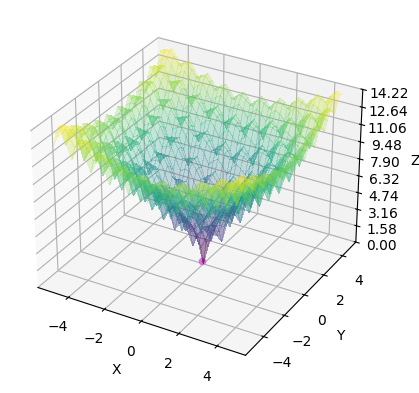

(-0.0588235294117645, -0.019607843137254832, 0.27479954703707676)

In [65]:
g.plot_x_and_y()

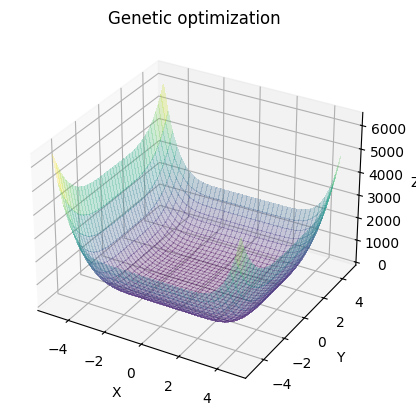

In [123]:
# PLEASE, RUN THIS IN PY FILE!
g1 = Genetic_optimization_for_x_and_y(f2, 40, 7, -5, 5, -5, 5, 8, 0.01, minimize = True)
g1.plot_dynamic()